In [1]:
import pickle
import pandas as pd
import warnings
from time import time
warnings.filterwarnings("ignore")

In [2]:
import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
with open("train.pkl", "rb") as infile:
    train_dic = pickle.load(infile)
with open("train_Y.pkl", "rb") as infile:
    train_Y_dic = pickle.load(infile)

In [4]:
dos_X = train_dic['dos']
dos_Y = train_Y_dic['dos']

probe_X = train_dic['probe']
probe_Y = train_Y_dic['probe']

R2L_X = train_dic['R2L']
R2L_Y = train_Y_dic['R2L']

U2R_X = train_dic['U2R']
U2R_Y = train_Y_dic['U2R']

In [5]:
def skfold(X, y, model):
    skf = StratifiedKFold(n_splits=10)
    skf.get_n_splits(X, y)
    results = cross_val_score(model, X, y, cv=skf)
    return results

In [6]:
t0 = time()
print("Initiating Build #1!")
print("1%..", end ="")
d_xgb = skfold(dos_X, dos_Y, xgboost.XGBClassifier())
print("15%..", end ="")
d_gnb = skfold(dos_X, dos_Y, GaussianNB())
print("30%..", end ="")
d_rf = skfold(dos_X, dos_Y, RandomForestClassifier())
print("45%..", end ="")
#d_svc = skfold(dos_X, dos_Y, SVC())
print("60%..", end ="")
d_ada = skfold(dos_X, dos_Y, AdaBoostClassifier())
print("75%..", end ="")
d_knn = skfold(dos_X, dos_Y, KNeighborsClassifier())
print("90%..", end ="")
d_MLPc = skfold(dos_X, dos_Y, MLPClassifier())
print("100%!")
print("Time taken {} seconds\n".format(time() - t0))
d_dic = {'XGB': d_xgb, 'RandomForest': d_rf, # 'SVC': d_svc,
         'GaussianNB': d_gnb, 'adaBoost': d_ada, 'KNN': d_knn, 'MLPc': d_MLPc}
d_dic

Initiating Build #1!
1%..15%..30%..45%..60%..75%..90%..100%!
Time taken 573.0790774822235 seconds



{'XGB': array([0.99938206, 0.99947034, 0.99947034, 0.99955858, 0.99973515,
        0.99947029, 0.99973515, 0.99973512, 0.99955854, 0.99938195]),
 'RandomForest': array([0.99947034, 0.99955862, 0.99973517, 0.99973515, 0.99973515,
        0.99991172, 0.99991172, 0.99973512, 0.99955854, 0.99964683]),
 'GaussianNB': array([0.80190678, 0.80367232, 0.82221045, 0.79879933, 0.80648009,
        0.80550896, 0.81195374, 0.80425569, 0.80240155, 0.80867032]),
 'adaBoost': array([0.99938206, 0.99876412, 0.99902895, 0.9988523 , 0.99867573,
        0.99920544, 0.99947029, 0.99894049, 0.99894049, 0.99911708]),
 'KNN': array([0.99823446, 0.99796963, 0.9988524 , 0.99911715, 0.9988523 ,
        0.99894058, 0.9988523 , 0.99823415, 0.99841074, 0.9988522 ]),
 'MLPc': array([0.99611582, 0.99549788, 0.99399718, 0.99523263, 0.99664518,
        0.97148406, 0.99408493, 0.99673318, 0.99779269, 0.99788098])}

In [7]:
t0 = time()
print("Initiating Build #2!")
print("1%..", end ="")
p_xgb = skfold(probe_X, probe_Y, xgboost.XGBClassifier())
print("15%..", end ="")
p_gnb = skfold(probe_X, probe_Y, GaussianNB())
print("30%..", end ="")
p_rf = skfold(probe_X, probe_Y, RandomForestClassifier())
print("45%..", end ="")
#p_svc = skfold(probe_X, probe_Y, SVC())
print("60%..", end ="")
p_ada = skfold(probe_X, probe_Y, AdaBoostClassifier())
print("75%..", end ="")
p_knn = skfold(probe_X, probe_Y, KNeighborsClassifier())
print("90%..", end ="")
p_MLPc = skfold(probe_X, probe_Y, MLPClassifier())
print("100%!")
print("Time taken {} seconds\n".format(time() - t0))
p_dic = {'XGB': p_xgb, 'RandomForest': p_rf,# 'SVC': p_svc,
         'GaussianNB': p_gnb, 'adaBoost': p_ada, 'KNN': p_knn, 'MLPc': p_MLPc}
p_dic

Initiating Build #2!
1%..15%..30%..45%..60%..75%..90%..100%!
Time taken 353.2246985435486 seconds



{'XGB': array([0.99873434, 0.99873434, 0.99860777, 0.99822785, 0.99860759,
        0.99822785, 0.99797443, 0.99835422, 0.99848082, 0.99873402]),
 'RandomForest': array([0.99898747, 0.9992406 , 0.99898747, 0.99936709, 0.99924051,
        0.99936709, 0.99936701, 0.99886062, 0.99860742, 0.99911381]),
 'GaussianNB': array([0.84862676, 0.84875332, 0.84786736, 0.84772152, 0.84835443,
        0.84949367, 0.84922142, 0.84858843, 0.84922142, 0.84833523]),
 'adaBoost': array([0.99759524, 0.99620301, 0.99594988, 0.99708861, 0.99683544,
        0.99632911, 0.99594885, 0.99822762, 0.99670844, 0.99632865]),
 'KNN': array([0.99658271, 0.99607645, 0.99696241, 0.99582278, 0.9964557 ,
        0.99620253, 0.99620205, 0.99632865, 0.99620205, 0.99620205]),
 'MLPc': array([0.98291356, 0.97709151, 0.97747121, 0.97316456, 0.97      ,
        0.98303797, 0.95682998, 0.97430054, 0.98455501, 0.96898342])}

In [8]:
t0 = time()
print("Initiating Build #3!")
print("1%..", end ="")
r_xgb = skfold(R2L_X, R2L_Y, xgboost.XGBClassifier())
print("15%..", end ="")
r_gnb = skfold(R2L_X, R2L_Y, GaussianNB())
print("30%..", end ="")
r_rf = skfold(R2L_X, R2L_Y, RandomForestClassifier())
print("45%..", end ="")
#r_svc = skfold(R2L_X, R2L_Y, SVC())
print("60%..", end ="")
r_ada = skfold(R2L_X, R2L_Y, AdaBoostClassifier())
print("75%..", end ="")
r_knn = skfold(R2L_X, R2L_Y, KNeighborsClassifier())
print("90%..", end ="")
r_MLPc = skfold(R2L_X, R2L_Y, MLPClassifier())
print("100%!")
print("Time taken {} seconds\n".format(time() - t0))
r_dic = {'XGB': r_xgb, 'RandomForest': r_rf,
         'GaussianNB': r_gnb, 'adaBoost': r_ada, 'KNN': r_knn, 'MLPc': r_MLPc}
r_dic

Initiating Build #3!
1%..15%..30%..45%..60%..75%..90%..100%!
Time taken 522.0952184200287 seconds



{'XGB': array([0.99912217, 0.99926847, 0.99824433, 0.99912204, 0.99882938,
        0.99926826, 0.99897556, 0.99824382, 0.99809747, 0.99839017]),
 'RandomForest': array([0.99956108, 0.99926847, 0.99839064, 0.99926836, 0.99926836,
        0.99941461, 0.99912191, 0.99839017, 0.99897556, 0.99882921]),
 'GaussianNB': array([0.98200439, 0.98098025, 0.98054133, 0.97995318, 0.97746561,
        0.98141373, 0.97965754, 0.98287721, 0.9786331 , 0.98112103]),
 'adaBoost': array([0.99853694, 0.99853694, 0.9973665 , 0.99853673, 0.99897571,
        0.99824382, 0.99839017, 0.99765842, 0.99692668, 0.99751207]),
 'KNN': array([0.99868325, 0.99839064, 0.99912217, 0.99853673, 0.9983904 ,
        0.99897556, 0.99839017, 0.99824382, 0.99809747, 0.99897556]),
 'MLPc': array([0.99517191, 0.99517191, 0.98434528, 0.99502488, 0.99180568,
        0.9891702 , 0.99121908, 0.98829211, 0.99443875, 0.98931655])}

In [9]:
t0 = time()
print("Initiating Build #4!")
print("1%..", end ="")
u_xgb = skfold(U2R_X, U2R_Y, xgboost.XGBClassifier())
print("15%..", end ="")
u_gnb = skfold(U2R_X, U2R_Y, GaussianNB())
print("30%..", end ="")
u_rf = skfold(U2R_X, U2R_Y, RandomForestClassifier())
print("45%..", end ="")
#u_svc = skfold(U2R_X, U2R_Y, SVC())
print("60%..", end ="")
u_ada = skfold(U2R_X, U2R_Y, AdaBoostClassifier())
print("75%..", end ="")
u_knn = skfold(U2R_X, U2R_Y, KNeighborsClassifier())
print("90%..", end ="")
u_MLPc = skfold(U2R_X, U2R_Y, MLPClassifier())
print("100%!")
print("Time taken {} seconds\n".format(time() - t0))
u_dic = {'XGB': u_xgb, 'RandomForest': u_rf,# 'SVC': u_svc,
         'GaussianNB': u_gnb, 'adaBoost': u_ada, 'KNN': u_knn, 'MLPc': u_MLPc}
u_dic

Initiating Build #4!
1%..15%..30%..45%..60%..75%..90%..100%!
Time taken 264.67765641212463 seconds



{'XGB': array([0.99925827, 0.99955496, 0.99970326, 0.99940644, 0.99985161,
        0.99955483, 0.99970322, 0.99955483, 0.99985161, 0.99970322]),
 'RandomForest': array([0.99955496, 0.99940662, 0.99970326, 0.99970322, 0.99985161,
        0.99940644, 0.99970322, 0.99910966, 0.99955483, 0.99970322]),
 'GaussianNB': array([0.81946299, 0.81397419, 0.81691395, 0.81139635, 0.81377059,
        0.82089331, 0.81332542, 0.81851907, 0.81095118, 0.80828016]),
 'adaBoost': array([0.99925827, 0.99955496, 0.99970326, 0.99955483, 1.        ,
        0.99925805, 0.99970322, 0.99970322, 0.99970322, 0.99970322]),
 'KNN': array([0.99925827, 0.99925827, 0.99910979, 0.99881288, 0.99970322,
        0.99925805, 0.99970322, 0.99925805, 0.99970322, 0.99970322]),
 'MLPc': array([0.99866489, 0.99896158, 0.99910979, 0.99732898, 0.99925805,
        0.99925805, 0.99896127, 0.99881288, 0.99925805, 0.99925805])}

In [15]:
def mod_stats(dictionary, name):
    def print_acc(results,model):
        print("Accuracy of {} is {} and std is {}" .format(model ,results.mean()*100, results.std()*100))
    for key ,value in dictionary.items():
        print_acc(value, key)
    results = pd.DataFrame(dictionary).applymap(lambda x: x*100)
    print(results)
    ax = results.plot(**{'linewidth':1.5, 'linestyle':'-.','marker':'o',\
                     'alpha':.6})
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
                    mode="expand", borderaxespad=0, ncol=3)
    plt.xlabel('n-fold')
    plt.ylabel('%accuracy')
    plt.savefig('validation/' + name + '_SKF.jpg',dpi=300,format='jpg')

>DOS model

Accuracy of XGB is 99.95497515041363 and std is 0.013358982791776722
Accuracy of RandomForest is 99.96998338162498 and std is 0.013789841746821924
Accuracy of GaussianNB is 80.65859233514337 and std is 0.6264252022180995
Accuracy of adaBoost is 99.90376959734823 and std is 0.02448208419817767
Accuracy of KNN is 99.86315921302126 and std is 0.03645177188413923
Accuracy of MLPc is 99.35464535708995 and std is 0.7463719082100989
         XGB  RandomForest  GaussianNB   adaBoost        KNN       MLPc
0  99.938206     99.947034   80.190678  99.938206  99.823446  99.611582
1  99.947034     99.955862   80.367232  99.876412  99.796963  99.549788
2  99.947034     99.973517   82.221045  99.902895  99.885240  99.399718
3  99.955858     99.973515   79.879933  99.885230  99.911715  99.523263
4  99.973515     99.973515   80.648009  99.867573  99.885230  99.664518
5  99.947029     99.991172   80.550896  99.920544  99.894058  97.148406
6  99.973515     99.991172   81.195374  99.947029  99.885230  99.4

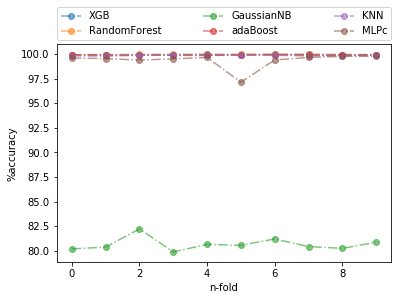

In [16]:
mod_stats(d_dic, 'dos')

>Probe model

Accuracy of XGB is 99.84683223676014 and std is 0.024974542588998956
Accuracy of RandomForest is 99.91139080166069 and std is 0.024020848242175537
Accuracy of GaussianNB is 84.86183559375323 and std is 0.055053258023476145
Accuracy of adaBoost is 99.6721486904281 and std is 0.07035098456573843
Accuracy of KNN is 99.63037381422151 and std is 0.029319405495574415
Accuracy of MLPc is 97.48347745908433 and std is 0.7899030823669634
         XGB  RandomForest  GaussianNB   adaBoost        KNN       MLPc
0  99.873434     99.898747   84.862676  99.759524  99.658271  98.291356
1  99.873434     99.924060   84.875332  99.620301  99.607645  97.709151
2  99.860777     99.898747   84.786736  99.594988  99.696241  97.747121
3  99.822785     99.936709   84.772152  99.708861  99.582278  97.316456
4  99.860759     99.924051   84.835443  99.683544  99.645570  97.000000
5  99.822785     99.936709   84.949367  99.632911  99.620253  98.303797
6  99.797443     99.936701   84.922142  99.594885  99.620205  95

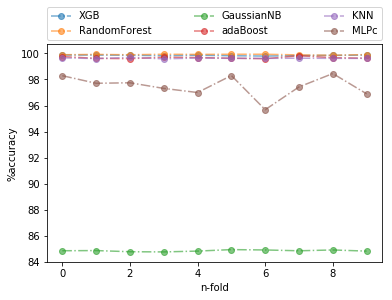

In [18]:
mod_stats(p_dic, 'probe')

>R2L model

Accuracy of XGB is 99.8756165354112 and std is 0.04402637207744811
Accuracy of RandomForest is 99.90488368636248 and std is 0.03829917051439733
Accuracy of GaussianNB is 98.04647377326654 and std is 0.151843253066596
Accuracy of adaBoost is 99.80683975823416 and std is 0.062367343637023044
Accuracy of KNN is 99.85805748686 and std is 0.03275831657567317
Accuracy of MLPc is 99.13956357565702 and std is 0.3460725732035759
         XGB  RandomForest  GaussianNB   adaBoost        KNN       MLPc
0  99.912217     99.956108   98.200439  99.853694  99.868325  99.517191
1  99.926847     99.926847   98.098025  99.853694  99.839064  99.517191
2  99.824433     99.839064   98.054133  99.736650  99.912217  98.434528
3  99.912204     99.926836   97.995318  99.853673  99.853673  99.502488
4  99.882938     99.926836   97.746561  99.897571  99.839040  99.180568
5  99.926826     99.941461   98.141373  99.824382  99.897556  98.917020
6  99.897556     99.912191   97.965754  99.839017  99.839017  99.121908


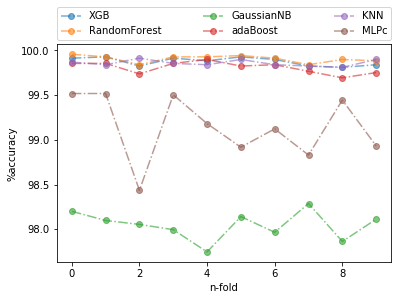

In [19]:
mod_stats(r_dic, 'r2l')

>U2R model

Accuracy of XGB is 99.96142257051638 and std is 0.0178021744170146
Accuracy of RandomForest is 99.95697043119026 and std is 0.02039903195238017
Accuracy of GaussianNB is 81.47487195682211 and std is 0.38725753421666587
Accuracy of adaBoost is 99.96142257051638 and std is 0.02119044386237504
Accuracy of KNN is 99.93768193667691 and std is 0.029526267404153258
Accuracy of MLPc is 99.88871588852632 and std is 0.05562085701877928
         XGB  RandomForest  GaussianNB    adaBoost        KNN       MLPc
0  99.925827     99.955496   81.946299   99.925827  99.925827  99.866489
1  99.955496     99.940662   81.397419   99.955496  99.925827  99.896158
2  99.970326     99.970326   81.691395   99.970326  99.910979  99.910979
3  99.940644     99.970322   81.139635   99.955483  99.881288  99.732898
4  99.985161     99.985161   81.377059  100.000000  99.970322  99.925805
5  99.955483     99.940644   82.089331   99.925805  99.925805  99.925805
6  99.970322     99.970322   81.332542   99.970322  99.9703

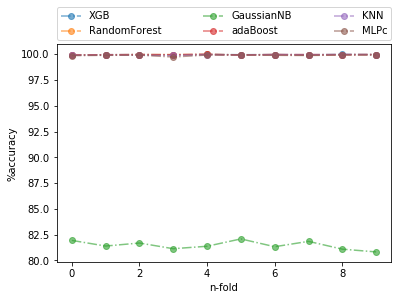

In [20]:
mod_stats(u_dic, 'u2r')